<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Kezhan_Ghalia_1_1_exercice_arbre_de_r%C3%A9gression_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

housing=pd.read_csv("https://dataks.bitbucket.io/ml/houses.csv")

In [ ]:
housing.head(10)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,420000,585,3,1,2,yes,no,yes,no,no,1,no
1,385000,400,2,1,1,yes,no,no,no,no,0,no
2,495000,306,3,1,1,yes,no,no,no,no,0,no
3,605000,665,3,1,2,yes,yes,no,no,no,0,no
4,610000,636,2,1,1,yes,no,no,no,no,0,no
5,660000,416,3,1,1,yes,yes,yes,no,yes,0,no
6,660000,388,3,2,2,yes,no,yes,no,no,2,no
7,690000,416,3,1,3,yes,no,no,no,no,0,no
8,838000,480,3,1,1,yes,yes,yes,no,no,0,no
9,885000,550,3,2,4,yes,yes,no,no,yes,1,no


In [ ]:
housing = housing.replace(to_replace='yes', value=1, regex=True)
housing = housing.replace(to_replace='no', value=0, regex=True)

# Arbre de régression


## Base d'apprentissage et de test

In [ ]:
from sklearn.model_selection import train_test_split

# choisir les variables explicatives, par exemple

var_choix=['lotsize']


var_choix=['lotsize','bedrooms','stories','bathrms','garagepl']


X = housing[var_choix]

y = housing[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Construction de l'arbre

**Questions** Construire l'arbre de régression

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Ecrire le code ici pour construire l'arbre de régression

reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X,y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**Questions** Afficher l'arbre de régression

[Text(334.8, 543.6, 'X[0] <= 595.5\nmse = 71172671399.516\nsamples = 546\nvalue = 681215.971'),
 Text(167.4, 326.16, 'X[3] <= 1.5\nmse = 34366399237.355\nsamples = 362\nvalue = 576388.122'),
 Text(83.7, 108.72000000000003, 'mse = 23155873061.224\nsamples = 294\nvalue = 540035.714'),
 Text(251.10000000000002, 108.72000000000003, 'mse = 52419275951.557\nsamples = 68\nvalue = 733558.824'),
 Text(502.20000000000005, 326.16, 'X[3] <= 1.5\nmse = 79431723566.907\nsamples = 184\nvalue = 887453.37'),
 Text(418.5, 108.72000000000003, 'mse = 54217285729.595\nsamples = 108\nvalue = 768939.815'),
 Text(585.9, 108.72000000000003, 'mse = 66940150124.654\nsamples = 76\nvalue = 1055867.368')]

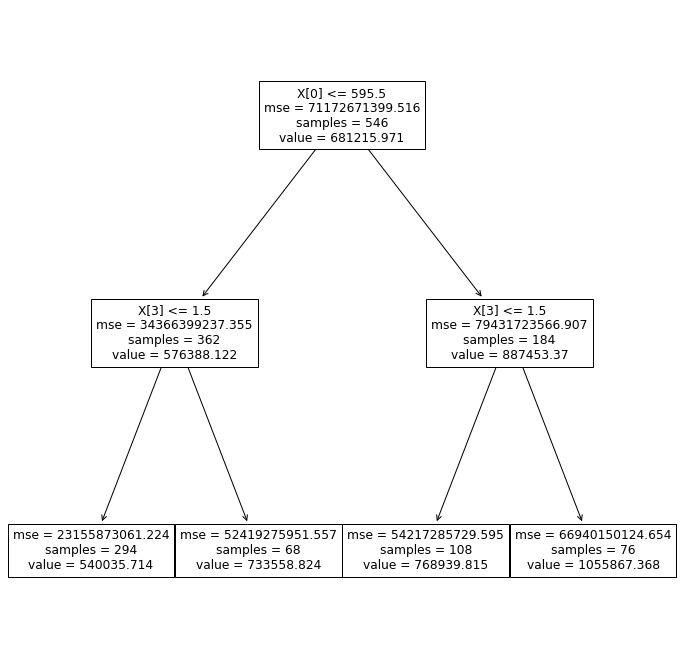

In [ ]:
from sklearn import tree

# 
fig,ax = plt.subplots(figsize=(12,12))
tree.plot_tree(reg)

# Boucle sur des hyperparamètres

**Question** Afin de trouver le meilleur hyperparamètre, on peut créer une boucle pour tester plusieurs valeurs possibles de l'hyperparamètre.



    parameter  train_score  test_score
0           1     0.475028    0.417229
1           2     0.475028    0.417229
2           3     0.475028    0.417229
3           4     0.475028    0.417229
4           5     0.475028    0.417229
5           6     0.475028    0.417229
6           7     0.475028    0.417229
7           8     0.475028    0.417229
8           9     0.475028    0.417229
9          10     0.475028    0.417229
10         11     0.475028    0.417229
11         12     0.475028    0.417229
12         13     0.475028    0.417229
13         14     0.475028    0.417229


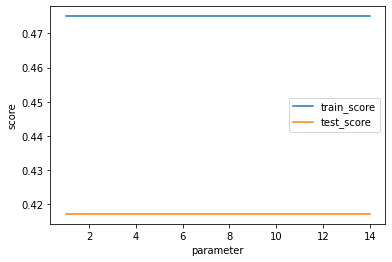

In [ ]:

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.4, random_state=0)

rows = []

for i in range(1,15):
    # entraîner le modèle en choissant l'hypermètre à tester
    rows.append([i,reg.score(X_train, y_train), reg.score(X_test, y_test)])
print("")

res_scores = pd.DataFrame(rows, columns=["parameter","train_score", "test_score"])
print(res_scores)

res_scores.plot(kind="line",x="parameter",y="train_score")

plt.plot(res_scores["parameter"],res_scores["test_score"], label = "test_score")
plt.xlabel('parameter')
plt.ylabel('score')
plt.legend()
plt.show()